## Least Squares Classification

### Generate classification data of two classes

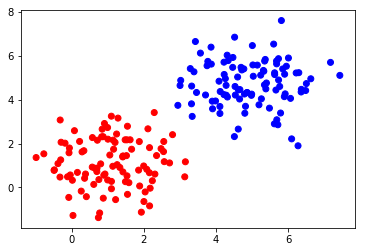

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x and y with color coding

def generator(N1, N2, K, sigma, form=0):
    mean = (1, 1)
    cov = [[sigma, 0], [0, sigma]]
    X1 = np.random.multivariate_normal(mean, cov, N1)
    c1 = ['red']*len(X1)

    mean = (5,5)
    cov = [[sigma, 0], [0, sigma]]
    X2 = np.random.multivariate_normal(mean, cov, N2)
    c2 = ['blue']*len(X2)

    X = np.concatenate((X1, X2))
    color = np.concatenate((c1, c2))

    # Index the points with T
    if form == -1:
         T = (-1)*np.ones([len(X), K])
    else:
        T = 0*np.ones([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0]=1
        if (n>=N1 and n<len(X1)+len(X2)):
            T[n][1] = 1
    T = T.astype(int)
    
    return X,T,color

X,T,color = generator(100, 100, 2, 1.0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

### Estimate w and Plot Decision Line

In [3]:
from numpy.linalg import inv

def get_matrix_gbf(x, m, T):

    # make an array of ones
    X_matrix_T = np.ndarray((len(x),), buffer=np.ones(len(x)))

    for i in range(m-1):
        X_list = x[:,i]
        for j in X_list:
            term = j
            X_matrix_T = np.append(X_matrix_T, term)
            
    X_matrix_T = np.array(X_matrix_T).reshape(m,len(X_list))
    X_matrix = X_matrix_T.T
    
    W = np.dot(np.dot(inv(np.dot(X_matrix_T, X_matrix)), X_matrix_T), T)
    
    return (W, X_matrix)

def get_y(w_vals, x_vals):
    w0 = w_vals[:,0]
    w1 = w_vals[:,1]
    y0 = []
    y1 = []
    for i in x_vals:
        y0 = np.append(y0,((-w0[1]/w0[2])*i[0] - (w0[0]/w0[2])))
        y1 = np.append(y1,((-w1[1]/w1[2])*i[0] - (w1[0]/w1[2])))
    return y0,y1

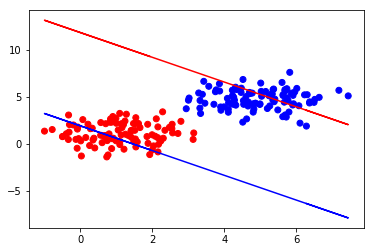

In [4]:
w,p =get_matrix_gbf(X, 3, T)
y0,y1 = get_y(w, X)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='red')
plt.plot(X[:, 0],y1,color='blue') 

### Observations of classification performance
1. Change of sigma
2. Class imbalance
3. Multiple changes using 1 decision line (woohoo)

#### Sigma change

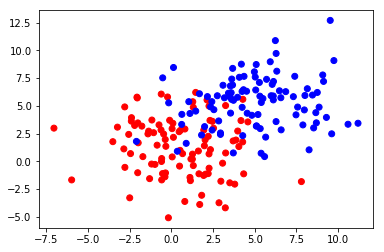

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x and y with color coding
X,T,color = generator(100,100,2, 7.0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

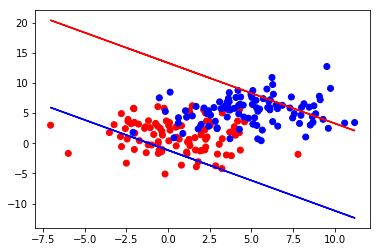

In [6]:
#  Plot with sigma = 7.0
w,p =get_matrix_gbf(X, 3,T)
y0,y1 = get_y(w, X)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='red')
plt.plot(X[:, 0],y1,color='blue') 

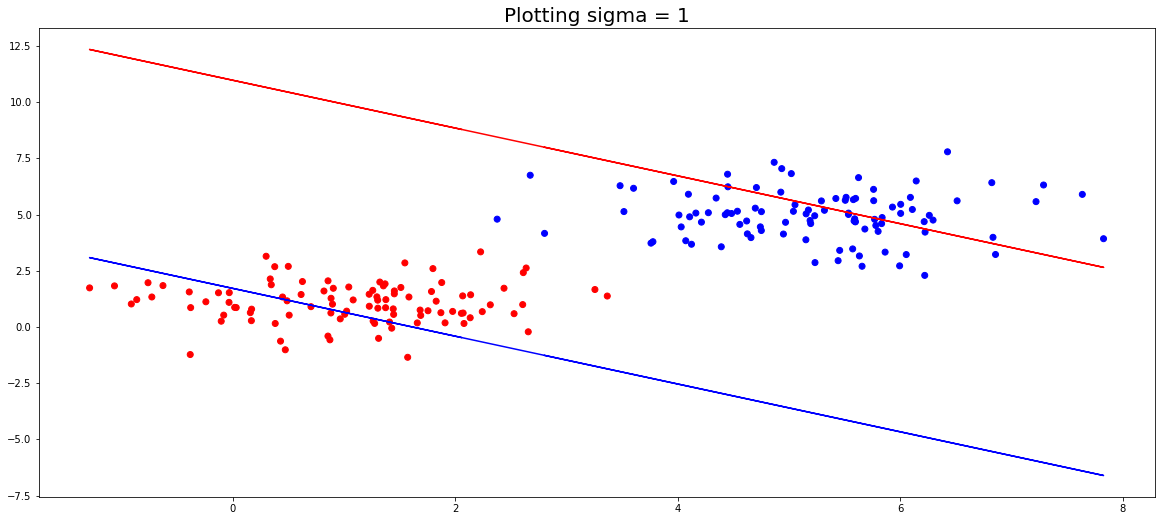

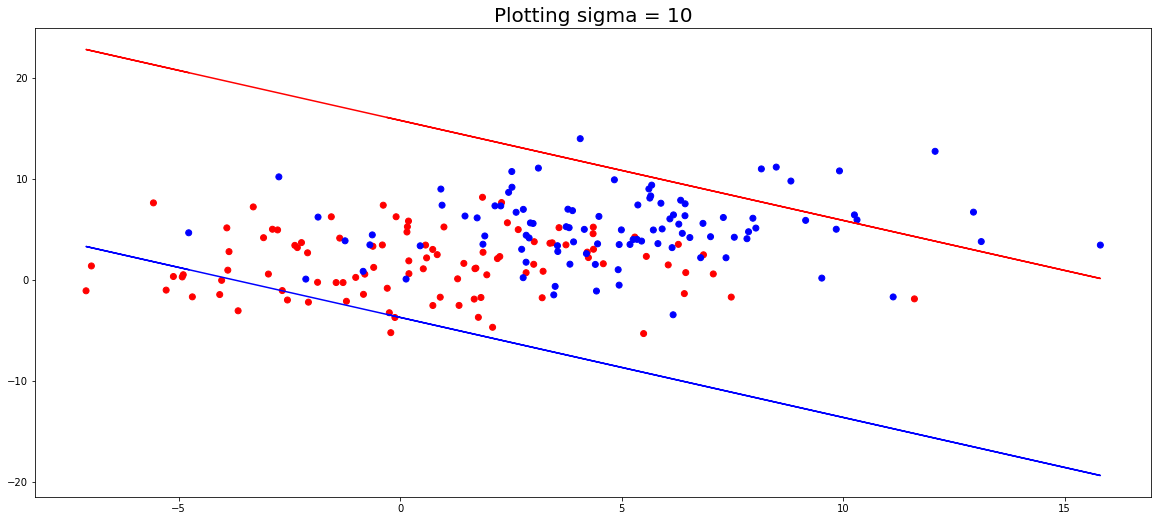

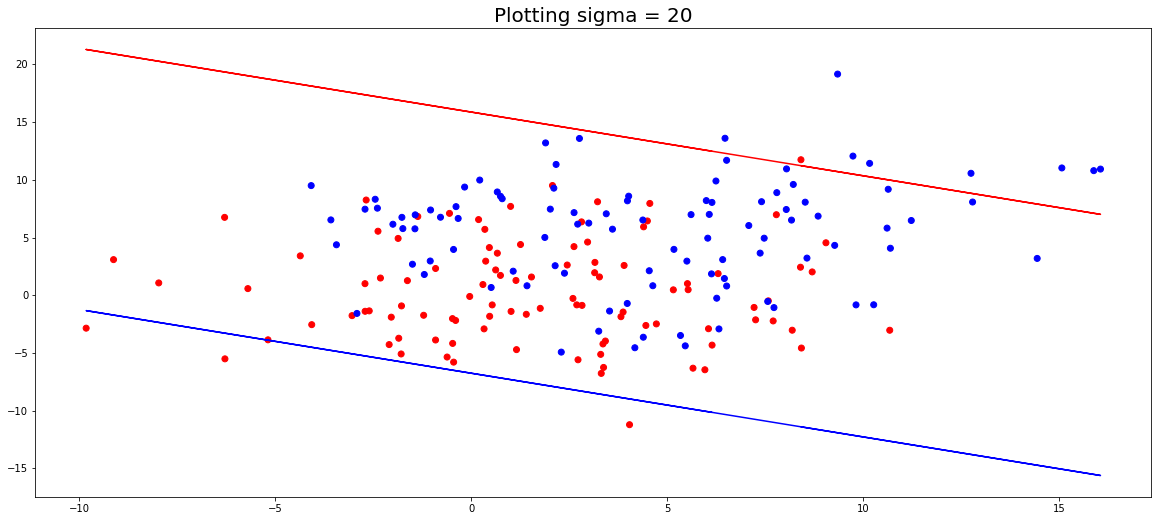

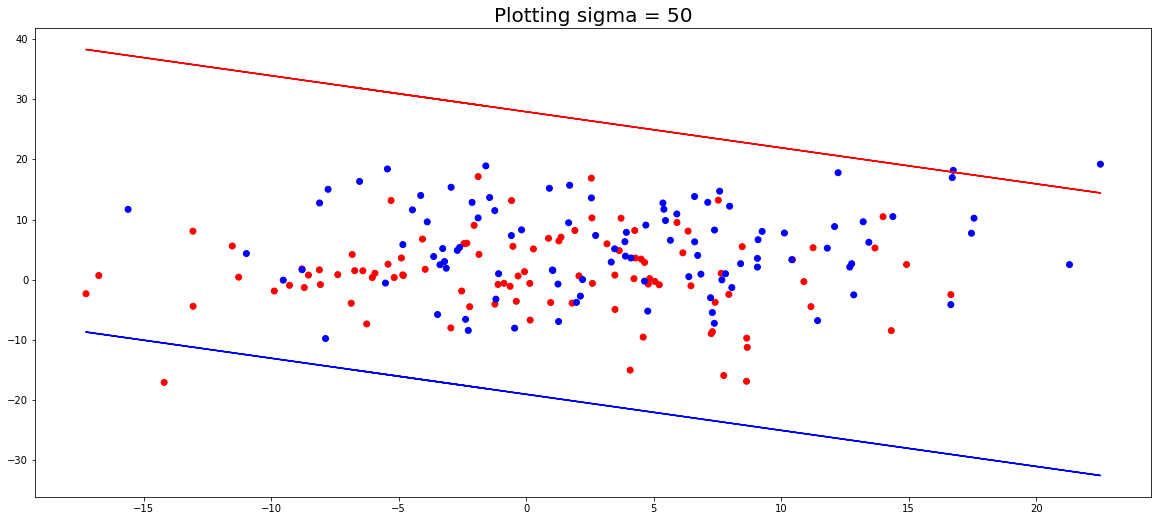

In [11]:
# Plot with multiple sigmas
counter=1
for i in [1,10,20,50]:
    counter += 0
    X,T,color = generator(100,100,2, i)
    w,p =get_matrix_gbf(X, 3,T)
    y0,y1 = get_y(w, X)
    
    fig = plt.figure(figsize=(20,50))
    ax = fig.add_subplot(5,1,counter)
    plt.title("Plotting sigma = {}".format(i), fontsize=20)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
    plt.plot(X[:, 0],y0, color ='red')
    plt.plot(X[:, 0],y1,color='blue') 

#### Number of points change

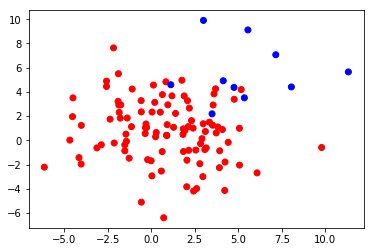

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x and y with color coding
X,T,color = generator(100,10,2,7.0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

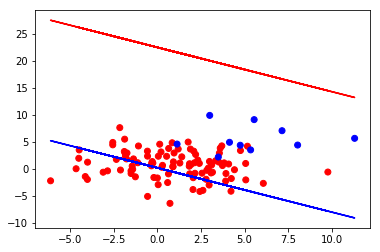

In [61]:
w,p =get_matrix_gbf(X, 3,T)
y0,y1 = get_y(w, X)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='red')
plt.plot(X[:, 0],y1,color='blue') 

[0.88530616 0.11469384]
[0.9917354 0.0082646]
[0.99126838 0.00873162]
[ 1.02443452 -0.02443452]


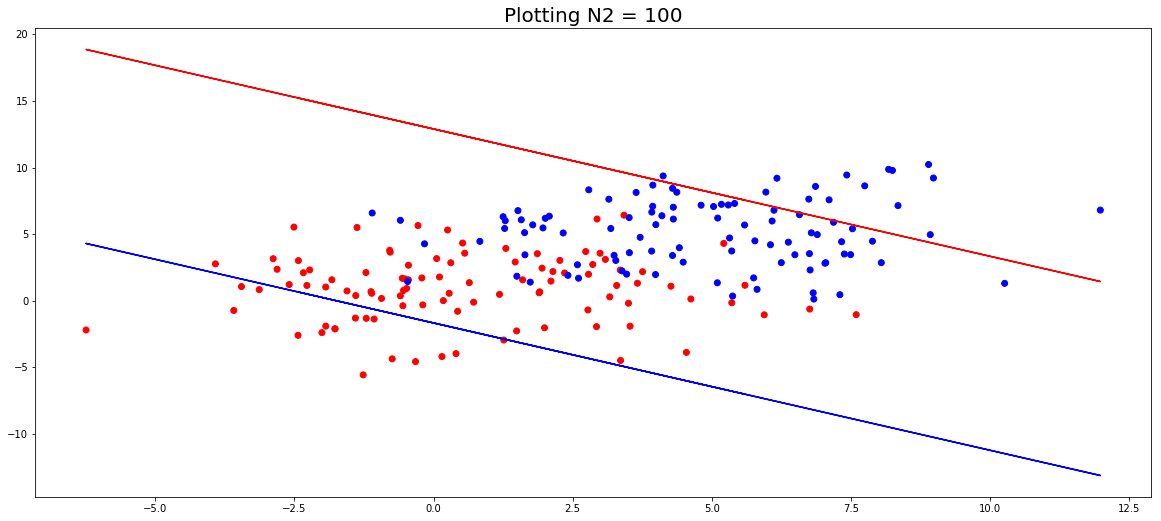

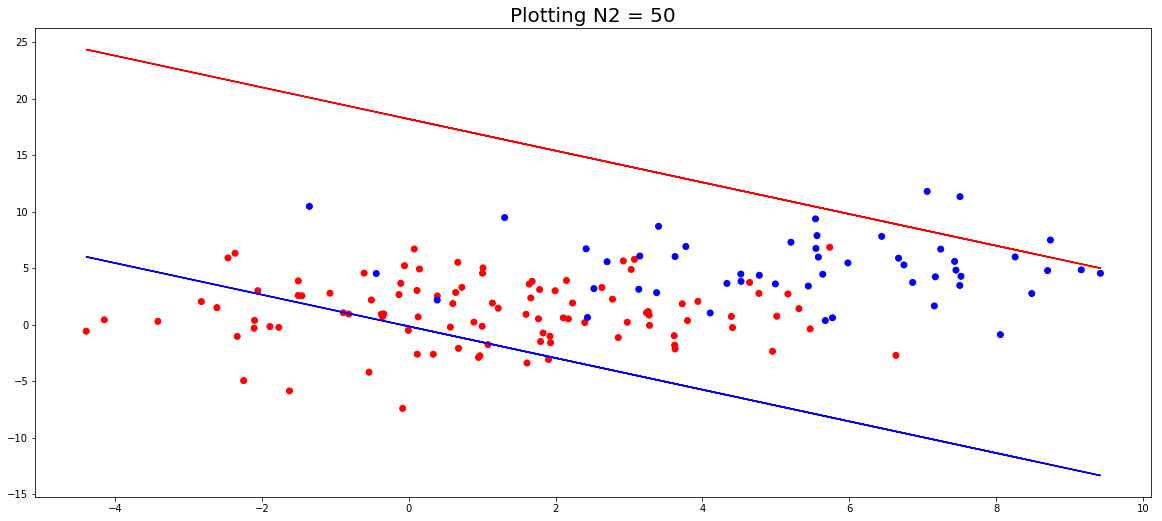

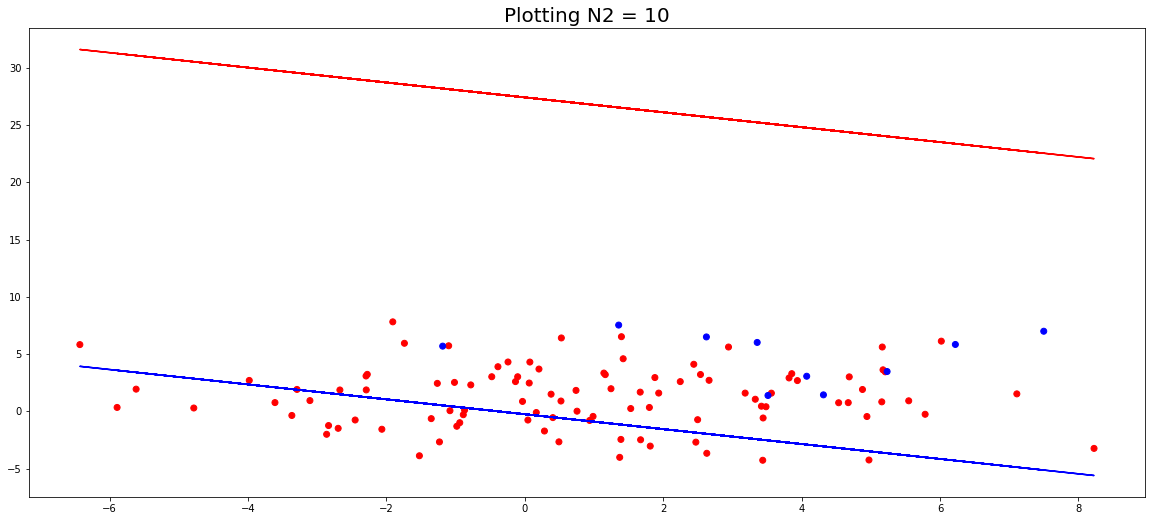

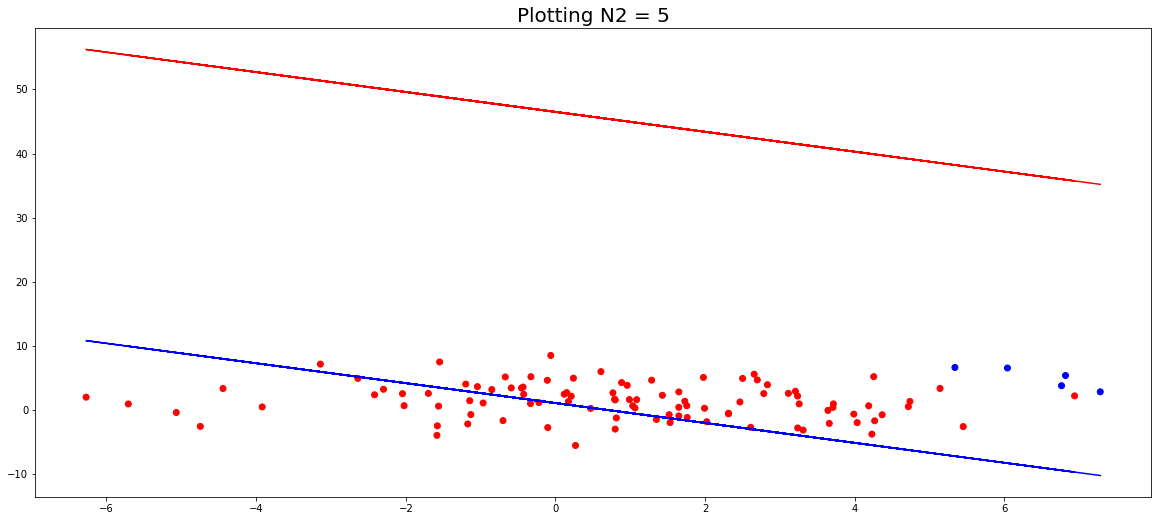

In [17]:
# Plot with varying sizes
counter=1
for i in [100, 50, 10, 5]:
    counter += 0
    X,T,color = generator(100,i,2, 7.0)
    w,p =get_matrix_gbf(X, 3,T)
    y0,y1 = get_y(w, X)
    print(w[0])
    
    fig = plt.figure(figsize=(20,50))
    ax = fig.add_subplot(5,1,counter)
    plt.title("Plotting N2 = {}".format(i), fontsize=20)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
    plt.plot(X[:, 0],y0, color ='red')
    plt.plot(X[:, 0],y1,color='blue') 

#### Changing multiple parameters

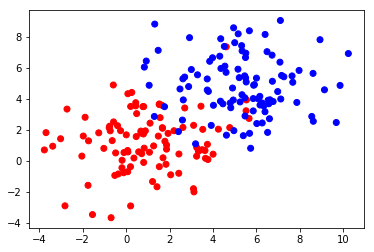

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x and y with color coding
X,T,color = generator(100,100,2,4.0,-1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

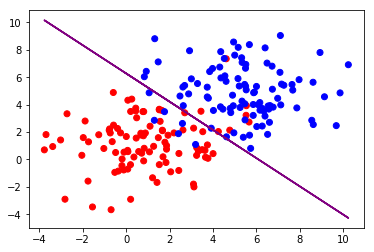

In [19]:
w,p =get_matrix_gbf(X, 3,T)
y0,y1 = get_y(w, X)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='purple')
plt.plot(X[:, 0],y1,color='purple') 

### Classification with Outliers

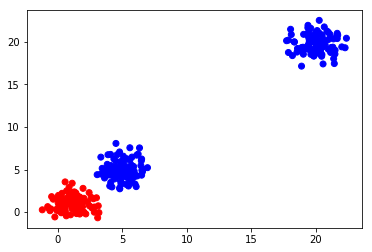

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x and y with color coding

N1 = 100
N2 = 100
N3 = 100
K = 2
sigma = 1.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red']*len(X1)

mean = (5,5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue']*len(X2)

mean = (20,20)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N2)
c3 = ['blue']*len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

# Index the points with T
T = 0*np.ones([len(X), K])
for n in range(0, len(X)):
    if (n<len(X1)):
        T[n][0]=1
    if (n>=N1 and n<len(X1)+len(X2)+len(X3)):
        T[n][1] = 1
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

#### 2 Decision lines

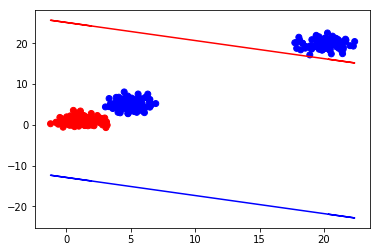

In [27]:
w,p =get_matrix_gbf(X, 3,T)
y0,y1 = get_y(w, X)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='red')
plt.plot(X[:, 0],y1,color='blue') 

#### 1 Decision line

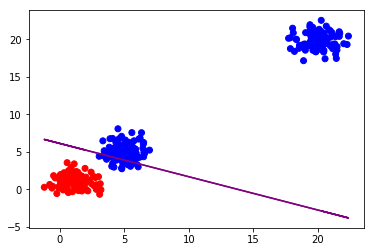

In [28]:
T = -1*np.ones([len(X), K])
for n in range(0, len(X)):
    if (n<len(X1)):
        T[n][0]=1
    if (n>=N1 and n<len(X1)+len(X2)+len(X3)):
        T[n][1] = 1
T = T.astype(int)

w,p =get_matrix_gbf(X, 3,T)
y0,y1 = get_y(w, X)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='purple')
plt.plot(X[:, 0],y1,color='purple') 

### 3 Classes Classification

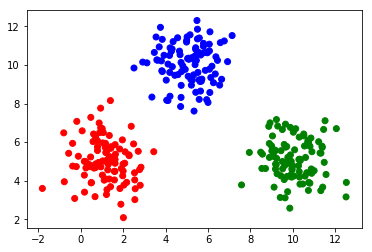

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x and y with color coding

N1 = 100
N2 = 100
N3 = 100
K = 3
sigma = 1.0

mean = (1, 5)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red']*len(X1)

mean = (5,10)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue']*len(X2)

mean = (10,5)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['green']*len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

# Index the points with T
T = 0*np.ones([len(X), K])
for n in range(0, len(X)):
    if (n<len(X1)):
        T[n][0]=1
    elif (n<len(X1)+len(X2)):
        T[n][1] = 1
    else:
        T[n][2] = 1
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

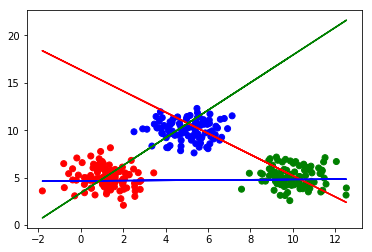

In [20]:
w,p =get_matrix_gbf(X, 3,T)
w0 = w[:,0]
w1 = w[:,1]
w2 = w[:,2]
y0 = []
y1 = []
y2 = []

for i in X:
    y0 = np.append(y0,((-w0[1]/w0[2])*i[0] - (w0[0]/w0[2])))
    y1 = np.append(y1,((-w1[1]/w1[2])*i[0] - (w1[0]/w1[2])))
    y2 = np.append(y2,((-w2[1]/w2[2])*i[0] - (w2[0]/w2[2])))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='red')
plt.plot(X[:, 0],y1,color='blue') 
plt.plot(X[:, 0],y2,color='green') 

### Task 17: Changing Means

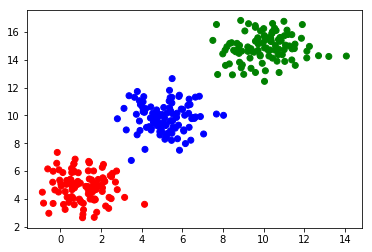

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x and y with color coding

N1 = 100
N2 = 100
N3 = 100
K = 3
sigma = 1.0

mean = (1, 5)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red']*len(X1)

mean = (5,10)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue']*len(X2)

mean = (10,15)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['green']*len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

# Index the points with T
T = 0*np.ones([len(X), K])
for n in range(0, len(X)):
    if (n<len(X1)):
        T[n][0]=1
    elif (n<len(X1)+len(X2)):
        T[n][1] = 1
    else:
        T[n][2] = 1
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

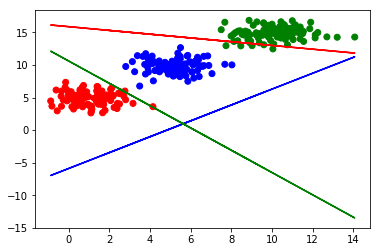

In [23]:
w,p =get_matrix_gbf(X, 3,T)
w0 = w[:,0]
w1 = w[:,1]
w2 = w[:,2]
y0 = []
y1 = []
y2 = []

for i in X:
    y0 = np.append(y0,((-w0[1]/w0[2])*i[0] - (w0[0]/w0[2])))
    y1 = np.append(y1,((-w1[1]/w1[2])*i[0] - (w1[0]/w1[2])))
    y2 = np.append(y2,((-w2[1]/w2[2])*i[0] - (w2[0]/w2[2])))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='red')
plt.plot(X[:, 0],y1,color='blue') 
plt.plot(X[:, 0],y2,color='green') 

## Predictive Distribution

### Implement Predictive Distribution

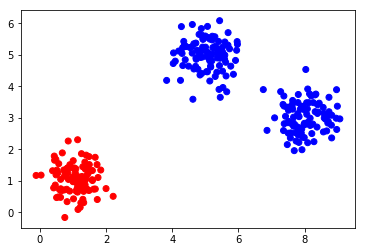

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x and y with color coding

N1 = 100
N2 = 100
N3 = 100
K = 2
sigma = 0.2
mean = (1,1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red']*len(X1)

mean = (5,5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue']*len(X2)

mean = (8,3)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N2)
c3 = ['blue']*len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

# Index the points with T
T = 0*np.ones([len(X), K])
for n in range(0, len(X)):
    if (n<len(X1)):
        T[n][0]=1
    if (n>=N1 and n<len(X1)+len(X2)+len(X3)):
        T[n][1] = 1
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

### Task 3: Generate Probability Map

In [86]:
# Defining functions for w_map

def get_sigmoid(x, w): #pass one multidim x, multidim w
    sig = []
    if sum(w) ==0:
        term = 0
    else:
        term = np.dot(w.T, x)
    sigterm = 1/(1+ np.exp(-term))
    sig.append(sigterm)
    return sig

def w_map(x,m,T, w, alpha):
    x_mat = get_matrix_gbf(x, m, T)[1] # x matrix
    s0 = np.dot((1/alpha), np.identity(m)) # S_0

    #r
    siglist = []
    for i in x:
        x_val = [1]
        x_val.extend(i)
        sig = get_sigmoid(x_val, w)
        sig = sig[0]*(1-sig[0])
        siglist.append(sig)
    r = np.diag(siglist)

    #sigmat
    sigmat =[]
    for j in x:
        x_val = [1]
        x_val.extend(j)
        sigmat.append(get_sigmoid(x_val,w))

    hinv =inv(np.dot(np.dot(x_mat.T, r),x_mat))
    e = np.dot(inv(s0),w).reshape(3,1) + np.dot(x_mat.T, (np.array(sigmat) - T[:,1].reshape(300,1)))
    w = w.reshape(3,1)
    w = (w - np.dot(hinv,e)).T

    return w[0], hinv

# Train w_map
w_old,h_old = w_map(X,3,T, np.array([0,0,0]), 0.1)
for i in range(5):
    w_old,h_old = w_map(X,3,T, w_old, 0.1)
print(w_old)


[-7.73441249  1.4280931   1.32686194]


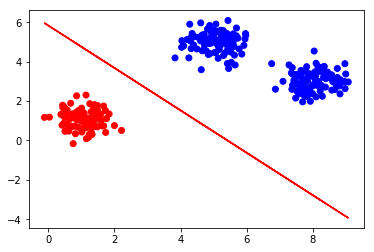

In [87]:
# Plot w 
y0 = []
for i in X:
    y0 = np.append(y0,((-w_old[1]/w_old[2])*i[0] - (w_old[0]/w_old[2])))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.plot(X[:, 0],y0, color ='red')

In [88]:
# Getting probability for each grid
import math

prob_grid = []
for i in range(100):
    x1_pt = 10 - i/10
    for j in range(100):
        x2_pt = j/10
        x_point = np.array([1, x1_pt, x2_pt]).reshape(3,1)
        amap = np.dot(w_old.T, x_point)[0]
        uncert = np.dot(np.dot(x_point.T, h_old), x_point)[0]
        term = amap/ np.sqrt(1 + np.dot((math.pi/8), uncert))
        prob = 1/(1+ np.exp(-term))
        prob_grid.append(prob[0])

prob_grid = np.array(prob_grid).reshape(100,100)     


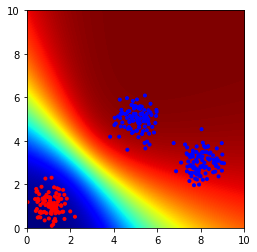

In [89]:
plt.scatter(X[:, 0], X[:, 1], marker='.', c=color,)
# plt.plot(X[:, 0],y0, color ='red')
plt.imshow(prob_grid, extent=[0,10,0,10], cmap='jet',interpolation="bicubic")

In [53]:
min(prob_grid), max(prob_grid)

(0.003454432722678237, 0.9997312856362437)

### Task 4: Generate Probability Map

In [110]:
x1_pt = input("Please input a preferred x point:")
x2_pt = input("Please input a preferred y point:")
x_point = np.array([1, x1_pt, x2_pt]).reshape(3,1)
amap = np.dot(w_old.T, (x_point).astype(float))[0]
uncert = np.dot(np.dot((x_point).astype(float).T, h_old), (x_point).astype(float))[0]
term = amap/ np.sqrt(1 + np.dot((math.pi/8), uncert))
prob = 1/(1+ np.exp(-term))

uncert = np.dot((x_point).astype(float).T, h_old)[0]
uncert = np.dot(uncert, (x_point).astype(float))[0]

if prob >0.5:
    print('''There is a higher probability of {} for this point to belong to the blue class'''.format(prob[0]))
else:
    print('''There is a higher probability of {} for this point to belong to the red class'''.format(1-prob[0]))
    
print("The uncertainty at this point would be: ", uncert)

Please input a preferred x point:1
Please input a preferred y point:1
There is a higher probability of 0.9844759563773354 for this point to belong to the red class
The uncertainty at this point would be:  1.1201475826219385
